In [1]:
using ThreeBodyProblem
using DifferentialEquations
using Plots

┌ Info: Precompiling ThreeBodyProblem [f5e9ba3c-56cf-4230-8a8f-3a70500a02a9]
└ @ Base loading.jl:1260
┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1260


In [2]:
μ₁ = 398600 # {km³/s²} gravitational parameter of Earth
μ₂ = 4903   # {km³/s²} gravitational parameter of the Moon
d = 384400  # {km} average distance between Earth and the Moon
p = [μ₁, μ₂, d];

In [3]:
R₁,R₂ = findR1R2(p)
ωₛ = sqrt((μ₁ + μ₂)/d^3);

In [4]:
Rₑ = 6378.0 # {km} radius of the Earth
Rₘ = 1738.0 # {km} radius of the Moon
h = 200.0   # {km} altitude of parking orbit

200.0

In [5]:
L1 = findL1(p)

3-element Array{Float64,1}:
 321709.2262741427
      0.0
      0.0

In [6]:
vᵢ₀ = 10.92367104   # {km/s} synodic frame injection velocity
ϕ₀ = 47.70061087    # {°}

47.70061087

In [7]:
vᵢ = vᵢ₀
ϕ = ϕ₀

47.70061087

In [8]:
r₀ = [-R₁ - (Rₑ + 200)*cosd(ϕ); -(Rₑ + 200)*sind(ϕ); 0]
v₀ = vᵢ*[sind(ϕ); -cosd(ϕ); 0];
rv₀ = [r₀;v₀]

6-element Array{Float64,1}:
 -9097.902229126237
 -4865.340542620438
     0.0
     8.07956515432666
    -7.3516811619605145
     0.0

In [20]:
tspan = [0.,86400*3] # 3 days

2-element Array{Float64,1}:
      0.0
 259200.0

In [21]:
prob = ODEProblem(CR3BPdynamics!,rv₀,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 259200.0)
u0: [-9097.902229126237, -4865.340542620438, 0.0, 8.07956515432666, -7.3516811619605145, 0.0]

In [22]:
sol = solve(prob,reltol=1e-6)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 63-element Array{Float64,1}:
      0.0
      0.19809124672090112
      2.1790037139299123
     21.988128386020023
     92.77445556208727
    196.7040728419146
    313.6634332305827
    448.2376041522557
    597.2035228951227
    763.4083842195563
    948.2694952929328
   1155.809131002734
   1390.207678778038
      ⋮
 250193.18973933958
 250567.14792499147
 250947.62391791673
 251376.4826908712
 251875.10024327427
 252477.99894171115
 253188.64971330628
 254029.11420488
 255034.2145462194
 256245.47623596815
 257715.77915348718
 259200.0
u: 63-element Array{Array{Float64,1},1}:
 [-9097.902229126237, -4865.340542620438, 0.0, 8.07956515432666, -7.3516811619605145, 0.0]
 [-9096.301617138297, -4866.796713458758, 0.0, 8.08078526123043, -7.350339808469269, 0.0]
 [-9080.282221079302, -4881.343792449304, 0.0, 8.092961930809905, -7.336904188970452, 0.0]
 [-8918.778804007976, -5025.335775285335, 0.0, 8.212236452245596, -7

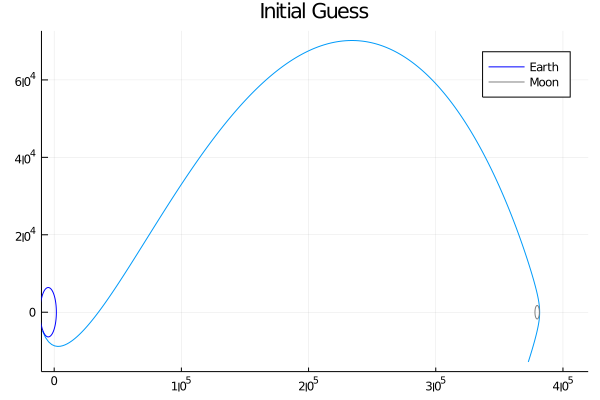

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [23]:
plot(sol,vars=(1,2),title="Initial Guess",label="")
# scatter!(L1[1],L1[2],marker="x")
plot_circle(Rₑ,[-R₁;0],color="blue",label="Earth")
plot_circle(Rₘ,[R₂;0],color="gray",label="Moon")